In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
df_zec_co2=pd.read_csv('ZECMIP_data/strict_collated_co2_timeseries_data.csv',index_col=0, sep=';', decimal=".")
df_zec_fgco2=pd.read_csv('ZECMIP_data/strict_collated_fgco2_timeseries_data_corrected.csv',index_col=0, sep=';', decimal=".")
df_zec_tas=pd.read_csv('ZECMIP_data/strict_collated_tas_timeseries_data.csv',index_col=0, sep=';', decimal=".")
df_zec_nbp=pd.read_csv('ZECMIP_data/strict_collated_nbp_timeseries_data.csv',index_col=0, sep=';', decimal=".")


<Axes: xlabel='Year'>

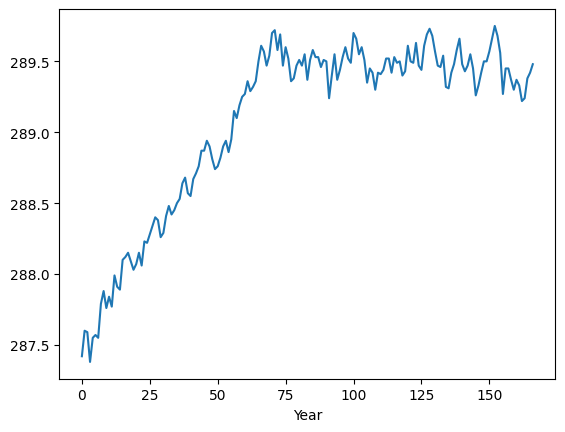

In [37]:
df_zec_tas['ACCESS'].plot()

In [38]:
df_zec_tas=df_zec_tas-2*df_zec_tas.iloc[:20].mean()+df_zec_tas.iloc[10:30].mean()

In [14]:
#df_zec_tas['ACCESS']=np.nan

<Axes: xlabel='Year'>

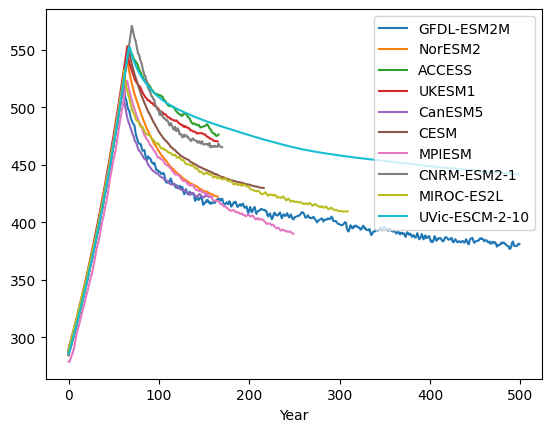

In [39]:
df_zec_co2.plot()

<Axes: xlabel='Year'>

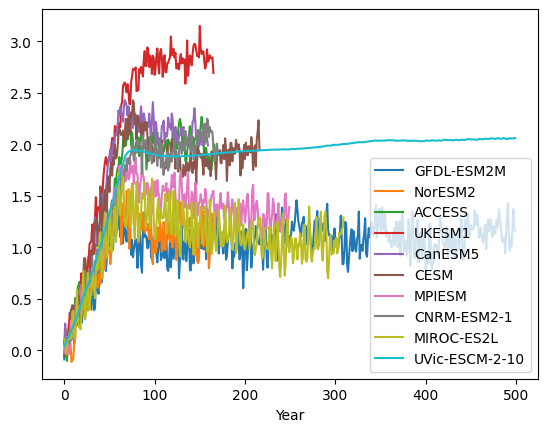

In [40]:
df_zec_tas.plot()

<Axes: xlabel='Year'>

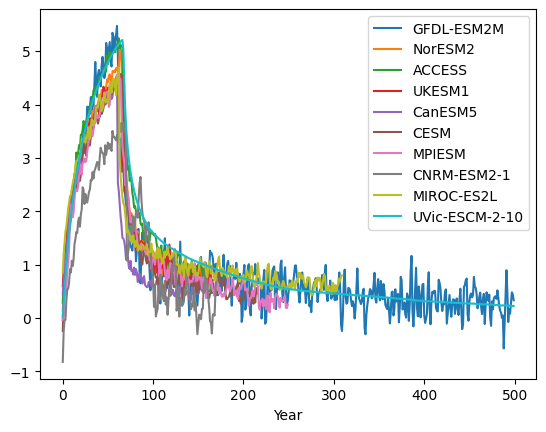

In [41]:
df_zec_fgco2.plot()

In [68]:
c_emis_zec=((-(df_zec_co2-df_zec_co2.iloc[0]).diff(periods=-1)*2.13)+df_zec_fgco2+df_zec_nbp)

<Axes: xlabel='Year'>

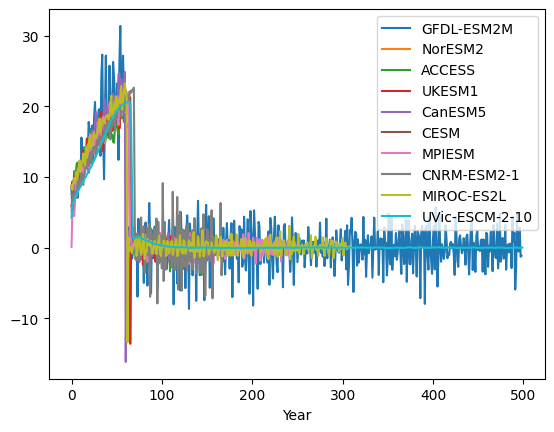

In [69]:
c_emis_zec.plot()

In [70]:
cezec=c_emis_zec/c_emis_zec.cumsum().iloc[100]*1000

<Axes: xlabel='Year'>

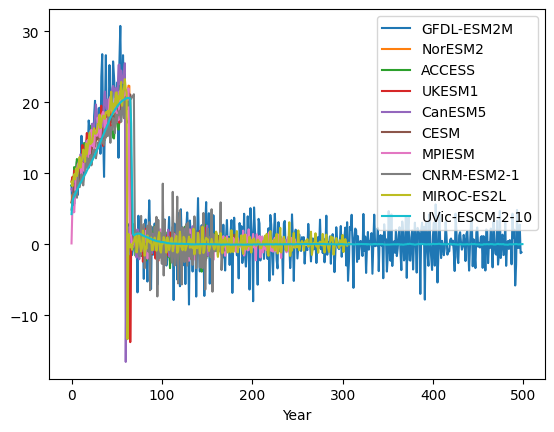

In [76]:
cezec.plot()

In [80]:
yr1000=(cezec.cumsum()>960).idxmax()+2

In [81]:
cezec

,GFDL-ESM2M,NorESM2,ACCESS,UKESM1,CanESM5,CESM,MPIESM,CNRM-ESM2-1,MIROC-ES2L,UVic-ESCM-2-10
Year,,,,,,,,,,
0.0,8.305767,5.878705,8.234273,8.794605,7.726493,5.887174,0.104820,4.866068,8.813142,4.230106
1.0,4.405298,6.932947,8.318287,9.474671,7.448379,6.384024,5.282004,5.795921,8.184618,6.041852
2.0,6.613638,7.057691,8.400999,8.397371,8.022057,7.113864,4.966213,7.014993,9.197660,6.443735
3.0,5.669931,8.312188,10.859535,10.366199,8.766563,8.475060,4.497533,6.927583,9.843297,6.743334
4.0,7.027614,7.951889,10.072367,10.091035,9.910397,8.533570,7.078122,7.439201,9.119376,7.028829
...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037830
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011675
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004559


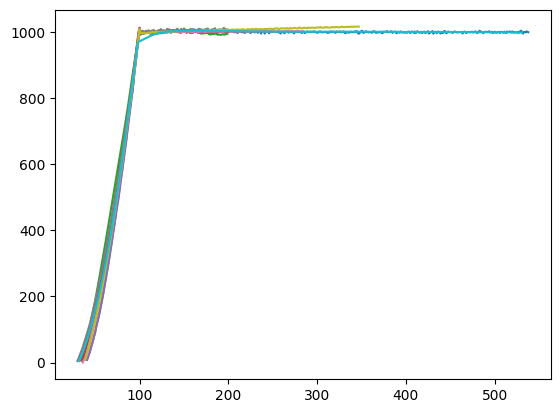

In [82]:
for m in cezec.columns:
    plt.plot(cezec.index-yr1000[m]+100,cezec[m].cumsum())


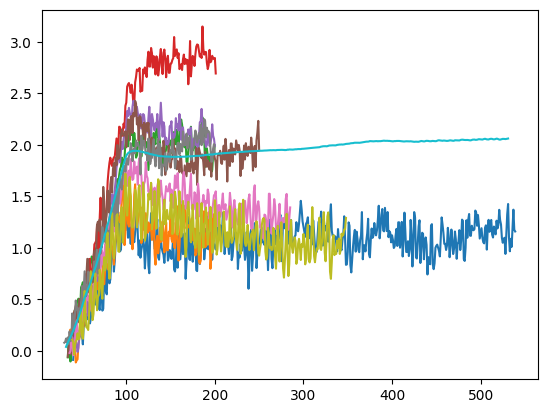

In [83]:
for m in cezec.columns:
    plt.plot(df_zec_tas.index-yr1000[m]+100,df_zec_tas[m])


In [84]:
mdlmap={}
mdlmap['CESM2']='CESM'
mdlmap['CNRM-ESM2-1']='CNRM-ESM2-1'
mdlmap['MPI-ESM1-2-LR']='MPIESM'
mdlmap['NorESM2-LM']='NorESM2'
mdlmap['UKESM']='UKESM1'
mdlmap['ACCESS-ESM1-5']='ACCESS'
mdlmap['UVic-ESCM-2-10']='UVic-ESCM-2-10'

usmdls=list(mdlmap.keys())

inv_map = {v: k for k, v in mdlmap.items()}

In [85]:
df_zec_tas.rename(columns=inv_map).filter(usmdls).to_csv('zecmip_tas.csv')
cezec.rename(columns=inv_map).filter(usmdls).to_csv('zecmip_emis.csv')